In [20]:
import numpy as np
%pylab inline
plt.style.use('plotting')

Populating the interactive namespace from numpy and matplotlib


# split galaxies along x=0 (0/180 deg)

61
6


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


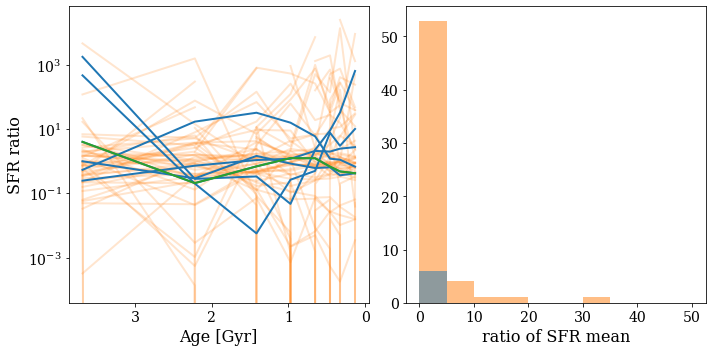

In [21]:
plt.figure(figsize=(10,5))
ax = subplot(121)
ax2 = subplot(122)
ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
print(len(ids0))   

noMM_max = []
MM_max = []

noMM_avg = []
MM_avg = []

for id in ids0:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_norecentMM_x0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    noMM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    noMM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C1',alpha=0.2)

ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
print(len(ids))

for id in ids:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_recentMM_x0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    MM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    MM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C0', lw=2)
    if id == 413061:
        ax.plot(times,ratio,color='C2', lw=2)

ax.set_yscale("log")
ax.invert_xaxis()
#plt.legend()
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('SFR ratio')
#plt.ylim(1e-6, 1e4)
#ax.set_ylim(0,10000)



# noMM_max = np.nan_to_num(noMM_max)
# MM_max = np.nan_to_num(MM_max)
# ax2.hist(noMM_max, bins=20,range=(0,10000), color='C1')
# ax2.hist(MM_max, bins=20,range=(0,10000), color='C0')
# ax2.set_xscale("log")

noMM_avg = np.nan_to_num(noMM_avg)
MM_avg = np.nan_to_num(MM_avg)
ax2.hist(noMM_avg, bins=10,range=(0,50), color='C1',alpha=0.5)
ax2.hist(MM_avg, bins=10, range=(0,50),color='C0',alpha=0.5)
ax2.set_xlabel('ratio of SFR mean')

#print(np.sort(noMM_avg))
#print(MM_avg, MM_max, ids)
plt.tight_layout()

# split galaxies at y=0 (90 degrees)

61
6


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


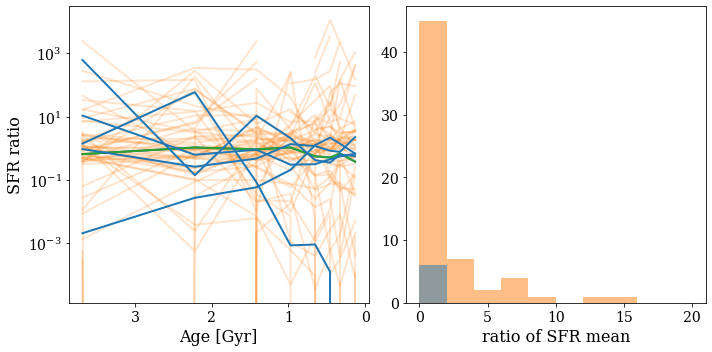

In [22]:
plt.figure(figsize=(10,5))
ax = subplot(121)
ax2 = subplot(122)
ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
print(len(ids0))   

noMM_max = []
MM_max = []

noMM_avg = []
MM_avg = []

for id in ids0:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_norecentMM_y0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    noMM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    noMM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C1',alpha=0.2)

ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
print(len(ids))

for id in ids:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_recentMM_y0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    MM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    MM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C0', lw=2)
    if id == 390429:
        ax.plot(times,ratio,color='C2', lw=2)

ax.set_yscale("log")
ax.invert_xaxis()
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('SFR ratio')
#ax.set_ylim(0,10000)



noMM_avg = np.nan_to_num(noMM_avg)
MM_avg = np.nan_to_num(MM_avg)
ax2.hist(noMM_avg, bins=10,range=(0,20), color='C1',alpha=0.5)
ax2.hist(MM_avg, bins=10, range=(0,20),color='C0',alpha=0.5)
ax2.set_xlabel('ratio of SFR mean')

#print(np.sort(noMM_avg), np.sort(MM_avg))
#print(MM_avg, MM_max, ids)
plt.tight_layout()

# split galaxies along m=1 (45 degrees)

61
6


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


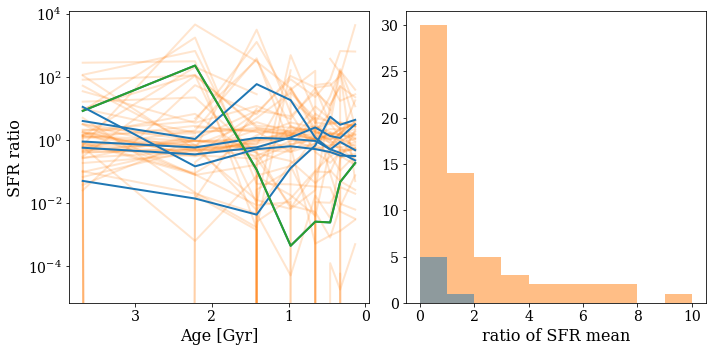

In [23]:
plt.figure(figsize=(10,5))
ax = subplot(121)
ax2 = subplot(122)
ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
print(len(ids0))   

noMM_max = []
MM_max = []

noMM_avg = []
MM_avg = []

for id in ids0:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_norecentMM_m1split.txt'%id)
    ratio = data[:,1]/data[:,2]
    noMM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    noMM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C1',alpha=0.2)

ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
print(len(ids))

for id in ids:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_recentMM_m1split.txt'%id)
    ratio = data[:,1]/data[:,2]
    MM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    MM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C0', lw=2)
    if id == 400733:
        ax.plot(times,ratio,color='C2', lw=2)

ax.set_yscale("log")
ax.invert_xaxis()
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('SFR ratio')
#ax.set_ylim(0,10000)



noMM_avg = np.nan_to_num(noMM_avg)
MM_avg = np.nan_to_num(MM_avg)
ax2.hist(noMM_avg, bins=10,range=(0,10), color='C1',alpha=0.5)
ax2.hist(MM_avg, bins=10, range=(0,10),color='C0',alpha=0.5)
ax2.set_xlabel('ratio of SFR mean')

#print(np.sort(noMM_avg), np.sort(MM_avg))
#print(MM_avg, MM_max, ids)
plt.tight_layout()

# split galaxies along m=-1 (135 deg)

61
6


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


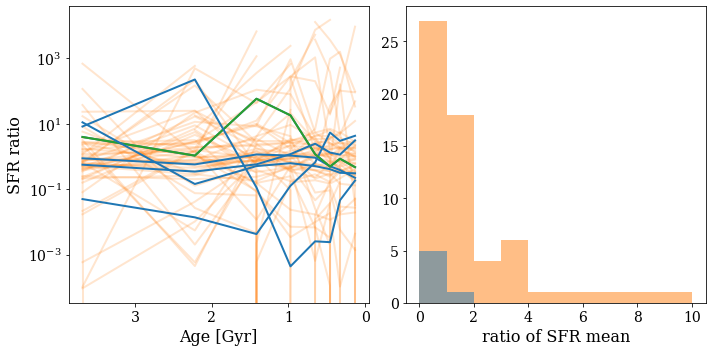

In [24]:
plt.figure(figsize=(10,5))
ax = subplot(121)
ax2 = subplot(122)
ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
print(len(ids0))   

noMM_max = []
MM_max = []

noMM_avg = []
MM_avg = []

for id in ids0:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_norecentMM_m-1split.txt'%id)
    ratio = data[:,1]/data[:,2]
    noMM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    noMM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C1',alpha=0.2)

ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
print(len(ids))

for id in ids:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_recentMM_m-1split.txt'%id)
    ratio = data[:,1]/data[:,2]
    MM_avg.append(np.mean(data[:,1])/np.mean(data[:,2]))
    times = list(data[:,0])
    MM_max.append(np.max(ratio))
    ax.plot(times,ratio,color='C0', lw=2)
    if id == 392544:
        ax.plot(times,ratio,color='C2', lw=2)

ax.set_yscale("log")
ax.invert_xaxis()
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('SFR ratio')
#ax.set_ylim(0,10000)



noMM_avg = np.nan_to_num(noMM_avg)
MM_avg = np.nan_to_num(MM_avg)
ax2.hist(noMM_avg, bins=10,range=(0,10), color='C1',alpha=0.5)
ax2.hist(MM_avg, bins=10, range=(0,10),color='C0',alpha=0.5)
ax2.set_xlabel('ratio of SFR mean')

#print(np.sort(noMM_avg), np.sort(MM_avg))
#print(MM_avg, MM_max, ids)
plt.tight_layout()